## Clustering 

## East-West Airlines Data
### Perform Clustering (Hierarchical, k-Means clustering and DBSCAN) for the Airlines data to obtain Optimum number of Clusters and Draw the Inferences from the Clusters obtained.

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score

## 2. Import Data

In [2]:
airlines_data=pd.read_excel(io='EastWestAirlines.xlsx', sheet_name='data')
airlines_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## 3. Data Understanding

**Data Description:**
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

- ID --Unique ID

- Balance--Number of miles eligible for award travel

- Qual_mile--Number of miles counted as qualifying for Topflight status

- cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
- cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
- cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

      1 = under 5,000
      2 = 5,000 - 10,000
      3 = 10,001 - 25,000
      4 = 25,001 - 50,000
      5 = over 50,000

- Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

- Bonus_trans--Number of non-flight bonus transactions in the past 12 months

- Flight_miles_12mo--Number of flight miles in the past 12 months

- Flight_trans_12--Number of flight transactions in the past 12 months

- Days_since_enrolled--Number of days since enrolled in flier program

- Award--whether that person had award flight (free flight) or not

### Initial Analysis

In [3]:
airlines_data.shape

(3999, 12)

In [4]:
airlines_data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
airlines_data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [6]:
airlines_data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


## 4. Data Pre-Processing

In [7]:
del airlines_data['ID#']

In [8]:
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [9]:
norm_scalar=MinMaxScaler()
airlines_data_scaled=norm_scalar.fit_transform(airlines_data)
airlines_data_scaled=pd.DataFrame(airlines_data_scaled, columns=airlines_data.columns)
airlines_data_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


## 5. Model Building

### i. Hierarchical Clustering

#### Let us see by tweeking different linkage methods:

**Single Linkage Method**

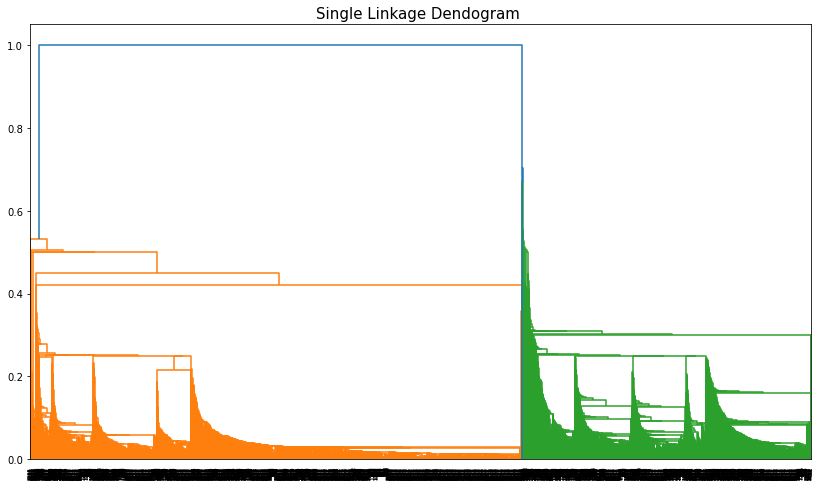

In [10]:
plt.figure(figsize=(14,8))
dendogram=sch.dendrogram(sch.linkage(airlines_data_scaled,method='single'))
plt.title('Single Linkage Dendogram ', size=15)
plt.show()

In [11]:
h_cluster=AgglomerativeClustering(n_clusters=4, linkage='single')

In [12]:
s_l_clusters=h_cluster.fit_predict(airlines_data_scaled)
print(s_l_clusters)

[1 1 1 ... 0 1 1]


In [13]:
pd.value_counts(s_l_clusters)

1    2518
0    1479
2       1
3       1
dtype: int64

In [14]:
print('Silhouette Score for Single Linkage Hierarchical Clustering:',silhouette_score(airlines_data_scaled, s_l_clusters))

Silhouette Score for Single Linkage Hierarchical Clustering: 0.48129679558120275


**Complete Linkage Method**

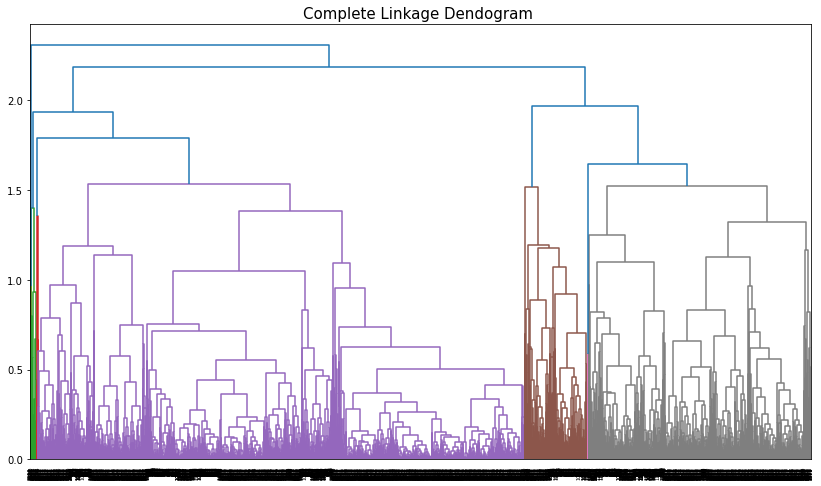

In [15]:
plt.figure(figsize=(14,8))
dendogram=sch.dendrogram(sch.linkage(airlines_data_scaled,method='complete'))
plt.title('Complete Linkage Dendogram ', size=15)
plt.show()

In [16]:
h_cluster=AgglomerativeClustering(n_clusters=4, linkage='complete')

In [17]:
c_l_clusters=h_cluster.fit_predict(airlines_data_scaled)
print(c_l_clusters)

[0 0 0 ... 2 0 0]


In [18]:
pd.value_counts(c_l_clusters)

0    2526
2    1144
1     325
3       4
dtype: int64

In [19]:
print('Silhouette Score for Complete Linkage Hierarchical Clustering:',silhouette_score(airlines_data_scaled, c_l_clusters))

Silhouette Score for Complete Linkage Hierarchical Clustering: 0.46459708515197673


**Average Linkage Method**

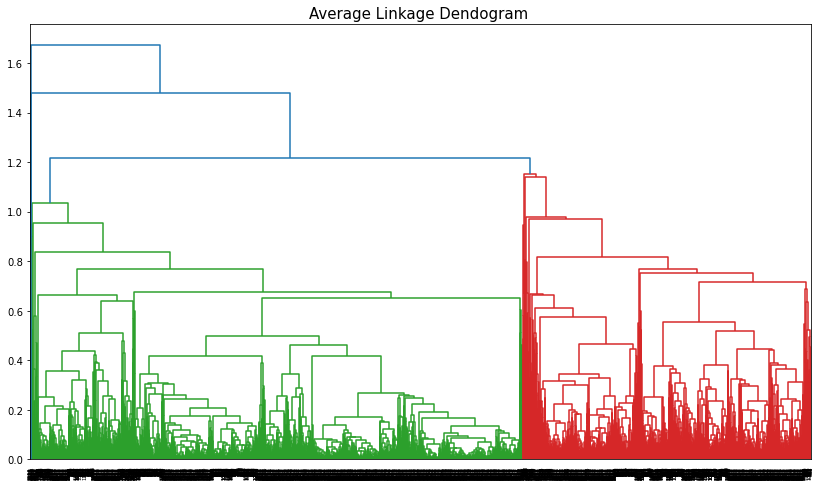

In [20]:
plt.figure(figsize=(14,8))
dendogram=sch.dendrogram(sch.linkage(airlines_data_scaled,method='average'))
plt.title('Average Linkage Dendogram ', size=15)
plt.show()

In [21]:
h_cluster=AgglomerativeClustering(n_clusters=4, linkage='average')

In [22]:
avg_l_clusters=h_cluster.fit_predict(airlines_data_scaled)
print(avg_l_clusters)

[1 1 1 ... 0 1 1]


In [23]:
pd.value_counts(avg_l_clusters)

1    2518
0    1476
3       4
2       1
dtype: int64

In [24]:
print('Silhouette Score for Complete Linkage Hierarchical Clustering:',silhouette_score(airlines_data_scaled, avg_l_clusters))

Silhouette Score for Complete Linkage Hierarchical Clustering: 0.5286018409871408


**Ward Linkage Method**

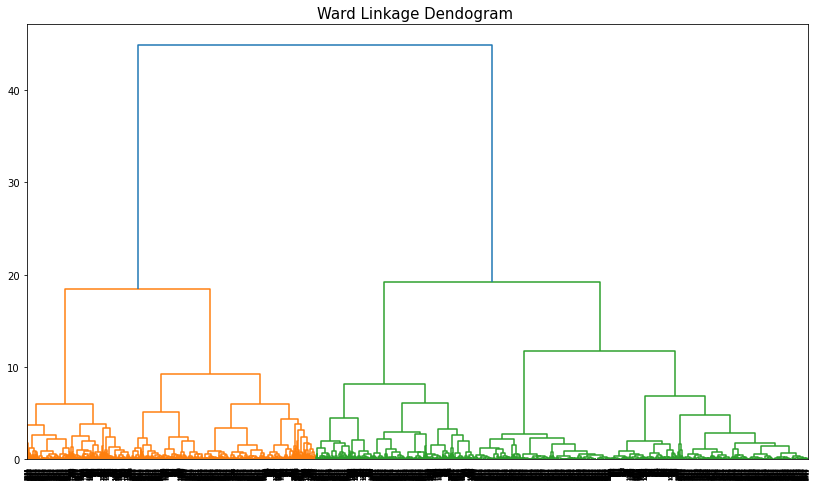

In [25]:
plt.figure(figsize=(14,8))
dendogram=sch.dendrogram(sch.linkage(airlines_data_scaled,method='ward'))
plt.title('Ward Linkage Dendogram ', size=15)
plt.show()

In [26]:
h_cluster=AgglomerativeClustering(n_clusters=4, linkage='ward')

In [27]:
w_l_clusters=h_cluster.fit_predict(airlines_data_scaled)
print(w_l_clusters)

[0 0 0 ... 1 0 0]


In [28]:
pd.value_counts(w_l_clusters)

0    1710
1     946
2     808
3     535
dtype: int64

In [29]:
print('Silhouette Score for Complete Linkage Hierarchical Clustering:',silhouette_score(airlines_data_scaled, w_l_clusters))

Silhouette Score for Complete Linkage Hierarchical Clustering: 0.42494300944261365


By seeing Silhouette Score, we can say that Average Linkage Hierarchical Clustering is performing good clustering

In [30]:
airlines_data['H_Clusters']=avg_l_clusters
airlines_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


### ii. k-Means Clustering

**Let us first find out the Optimum number for 'k' by using Elbow method**

In [31]:
wcss=[]
for i in range(2,11):
    k_means=KMeans(i)
    k_means.fit(airlines_data_scaled)
    wcss.append(k_means.inertia_)

In [32]:
print(wcss)

[823.6756984125232, 625.1684881570748, 436.71719004195575, 348.9433217254147, 315.1494737804613, 287.8950613257915, 263.19595138861223, 243.91556603668823, 226.11007205137813]


**Plotting Elbow Method**

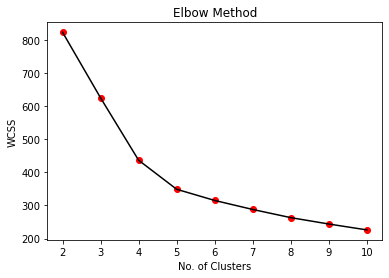

In [33]:
plt.plot(range(2,11), wcss, color='black')
plt.scatter(range(2,11), wcss, color='red')
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

By seeing the plot we can say that elbow point is at 4. Therefore k=4

In [34]:
k_means=KMeans(n_clusters=4, random_state=10)
k_means.fit(airlines_data_scaled)

KMeans(n_clusters=4, random_state=10)

In [35]:
k_means_cluster=k_means.predict(airlines_data_scaled)
print(k_means_cluster)

[0 0 0 ... 1 0 0]


In [36]:
airlines_data['k-Means_Clusters']=k_means_cluster
airlines_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_Clusters,k-Means_Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0


### iii. Using DBSCAN 

In [37]:
dbscan=DBSCAN(eps=1,min_samples=5,metric='euclidean')

In [38]:
db_cluster=dbscan.fit_predict(airlines_data_scaled)
print(db_cluster)

[0 0 0 ... 1 0 0]


In [39]:
airlines_data['DBSCAN_Clusters']=db_cluster
airlines_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_Clusters,k-Means_Clusters,DBSCAN_Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,2,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,2,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0,0


## Model Validation Using Silhoutte Score

**Tells us validation of consistency within clusters of data**

In [40]:
silhouette_score(airlines_data_scaled, avg_l_clusters) # Silhoutte score for Hierarchical Clustering

0.5286018409871408

In [41]:
silhouette_score(airlines_data_scaled, k_means_cluster) # Silhoutte score for k-Means Clustering

0.47483765255961

In [42]:
silhouette_score(airlines_data_scaled, db_cluster) ## Silhoutte score for DBSCAN

0.535930510919477

**From seeing the above silhoutte score, DBSCAN and Hierarchical clustring are performing some good consitancy**

## =============================================================================